In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)

## Чтение данных

In [3]:
def read_pkl(path):
    df = pd.read_pickle(path)
    print(df.shape)
    display(df.head())
    return df

In [4]:
calls = read_pkl('calls_new.pickle')

(35891, 4)


,Call Start Time,Call Owner Name,CONTACTID,Call Duration (in seconds)
4,2023-07-04 15:35:00,Jane Smith,5805028000000645014,20
6,2023-07-06 12:00:00,Alice Johnson,5805028000000942003,884
7,2023-07-06 12:21:00,Alice Johnson,5805028000001068001,101
8,2023-07-06 14:16:00,Alice Johnson,5805028000001079118,871
9,2023-07-06 14:33:00,Alice Johnson,5805028000001076115,51


In [5]:
spend = read_pkl('spend_new.pickle')

(20517, 8)


,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
7,2023-07-03,Bloggers,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
5,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
6,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1


In [6]:
deals = read_pkl('deals_new.pickle')

(21382, 19)


,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,SLA Minutes,Paid
0,5805028000000922001,Bob Brown,2023-07-03,Lost,Refugee,NaN,Organic,NaN,NaN,NaN,2023-07-03 17:03:00,<NA>,<NA>,0,0,5805028000001009140,NaN,7127,0
1,5805028000000927004,Bob Brown,2023-07-09,Lost,Does not speak English,03.07.23women,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:17:00,<NA>,<NA>,0,<NA>,5805028000000961001,NaN,<NA>,0
2,5805028000000945016,Jane Smith,2023-08-29,Lost,Changed Decision,02.07.23wide_DE,Facebook Ads,NaN,NaN,NaN,2023-07-03 20:39:00,<NA>,<NA>,0,<NA>,5805028000000968001,NaN,81781,0
3,5805028000000948010,Jane Smith,2023-08-29,Lost,needs time to think,03.07.23women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,<NA>,<NA>,0,<NA>,5805028000000979006,NaN,<NA>,0
4,5805028000000970006,Jane Smith,2023-07-04,Lost,Duplicate,03.07.23women,Facebook Ads,NaN,NaN,NaN,2023-07-04 07:10:00,<NA>,<NA>,0,<NA>,5805028000000979006,NaN,<NA>,0


## Общая статистика по числовым полям

In [7]:
def plot_histograms(dataframe, cols):
    num_cols = len(cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))
    if num_cols == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols):
        dataframe[col].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'Гистограмма {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

In [8]:
def plot_boxplots(dataframe, cols):
    num_cols = len(cols)
    
    # Создаем подграфики
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))  # количество графиков в ряду и размер
    
    # Если в списке одна колонка, нужно обработать ось как единственную
    if num_cols == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols):
        dataframe.boxplot(column=col, ax=ax)
        ax.set_title(f'Boxplot {col}')
    
    plt.tight_layout()
    plt.show()

### calls

In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35891 entries, 4 to 37238
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Start Time             35891 non-null  datetime64[ns]
 1   Call Owner Name             35891 non-null  object        
 2   CONTACTID                   35891 non-null  Int64         
 3   Call Duration (in seconds)  35891 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [10]:
col_dur = 'Call Duration (in seconds)'
cols_calls_num = [col_dur]
cols_calls_cat = ['Call Owner Name', 'CONTACTID']

In [11]:
calls[cols_calls_num].describe()

,Call Duration (in seconds)
count,35891.0
mean,416.261598
std,558.340819
min,20.0
25%,61.0
50%,190.0
75%,523.0
max,7625.0


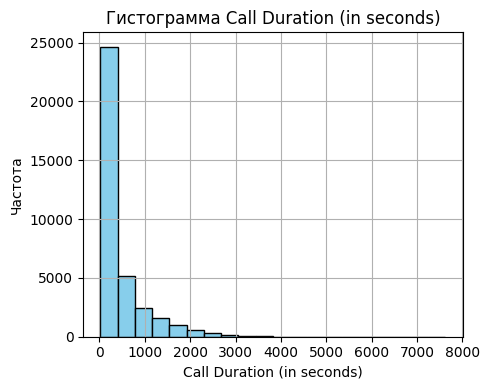

In [12]:
plot_histograms(calls, cols_calls_num)

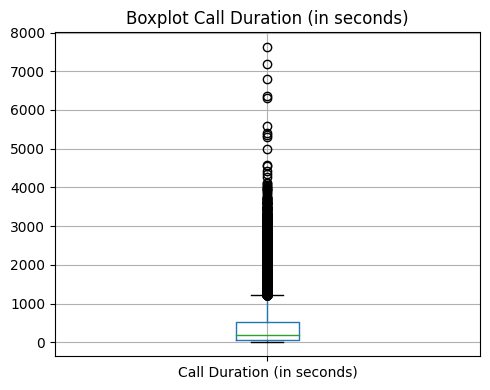

In [13]:
plot_boxplots(calls, cols_calls_num)

In [14]:
print(f'Средняя продолжительность звонков={int(calls[col_dur].mean()/60)}, медиана={int(calls[col_dur].median()/60)} (мин.)')

Средняя продолжительность звонков=6, медиана=3 (мин.)


### spend

In [15]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20517 entries, 7 to 20772
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20517 non-null  datetime64[ns]
 1   Source       20517 non-null  object        
 2   Campaign     14616 non-null  object        
 3   Impressions  20517 non-null  int64         
 4   Spend        20517 non-null  float64       
 5   Clicks       20517 non-null  int64         
 6   AdGroup      13782 non-null  object        
 7   Ad           13782 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.4+ MB


In [16]:
cols_spend_num = ['Impressions', 'Spend', 'Clicks']
# cols_spend_cat = ['Source', 'Ad', 'Campaign_Date', 'Campaign_Country', 'Campaign_Generalized']
cols_spend_cat = ['Source', 'Campaign', 'AdGroup', 'Ad']


In [17]:
spend[cols_spend_num].describe()

,Impressions,Spend,Clicks
count,20517.000000,20517.000000,20517.000000
mean,2487.451431,7.258139,24.237218
std,11512.317881,26.920710,85.742144
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,64.000000,0.580000,1.000000
75%,723.000000,5.790000,13.000000
max,431445.000000,774.000000,2415.000000


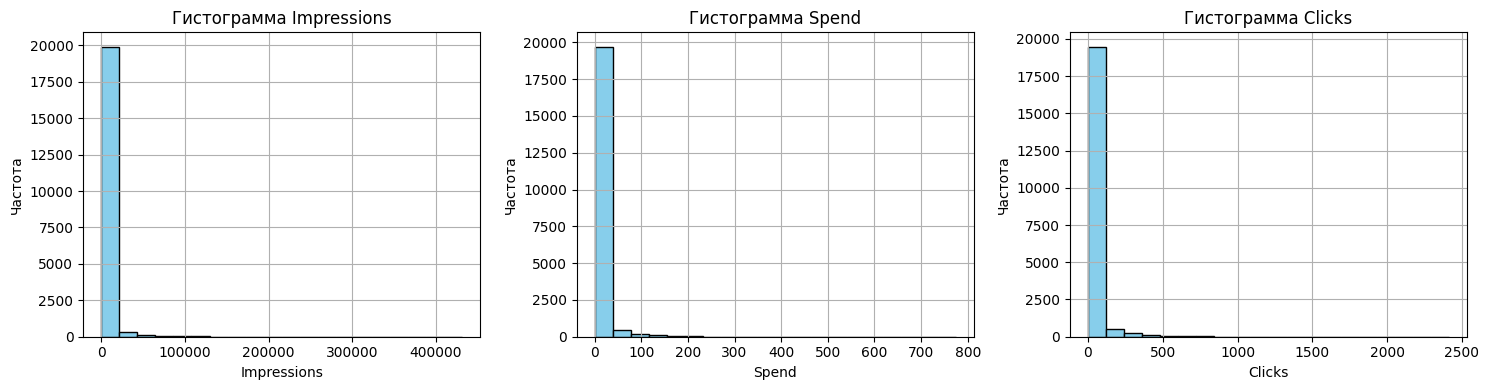

In [18]:
plot_histograms(spend, cols_spend_num)

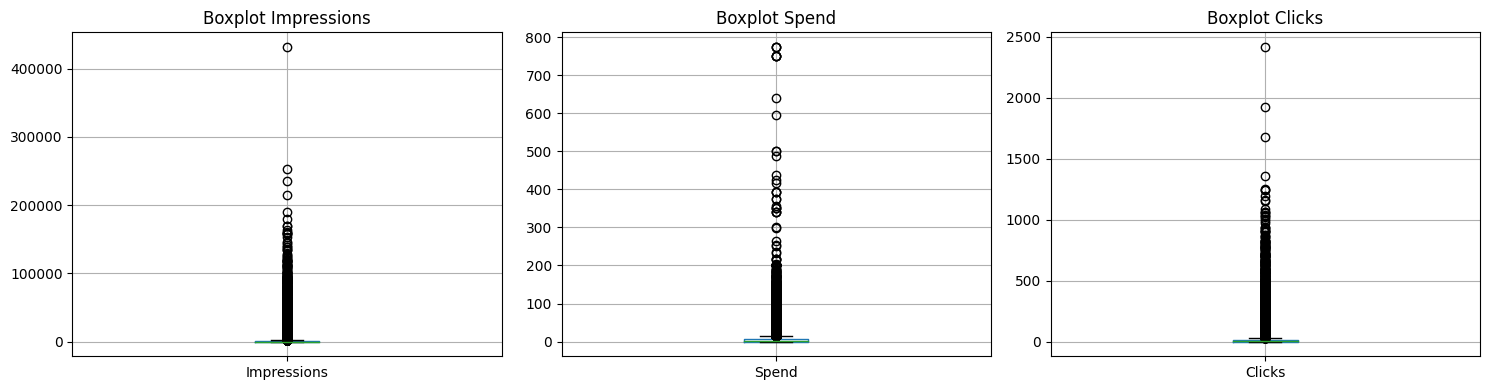

In [19]:
plot_boxplots(spend, cols_spend_num)

### deals

In [20]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21382 entries, 0 to 21541
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21382 non-null  Int64         
 1   Deal Owner Name      21353 non-null  object        
 2   Closing Date         14535 non-null  datetime64[ns]
 3   Stage                21382 non-null  object        
 4   Lost Reason          15998 non-null  object        
 5   Campaign             15935 non-null  object        
 6   Source               21382 non-null  object        
 7   Payment Type         494 non-null    object        
 8   Product              3556 non-null   object        
 9   Education Type       3263 non-null   object        
 10  Created Time         21382 non-null  datetime64[ns]
 11  Course duration      3551 non-null   Int16         
 12  Months of study      834 non-null    Int16         
 13  Initial Amount Paid  21382 non-null 

Колонку 'Course duration' будет анализировать с категориальными, поскольу только 2 варианта продолжительности

In [21]:
cols_deals_num = ['Months of study', 'Offer Total Amount', 'SLA Minutes']
cols_deals_cat = [
    'Deal Owner Name', 'Stage', 'Lost Reason',
    'Payment Type', 'Product', 'Education Type', 'Course duration',
    'City',
    'Source', 'Campaign',
]

In [22]:
deals[cols_deals_num].describe()

,Months of study,Offer Total Amount,SLA Minutes
count,834.0,4143.0,15360.0
mean,5.452038,7141.134444,1915.961914
std,2.926589,4632.091173,12213.277798
min,0.0,0.0,0.0
25%,3.0,3000.0,72.0
50%,5.0,11000.0,328.5
75%,8.0,11000.0,935.0
max,11.0,11500.0,447034.0


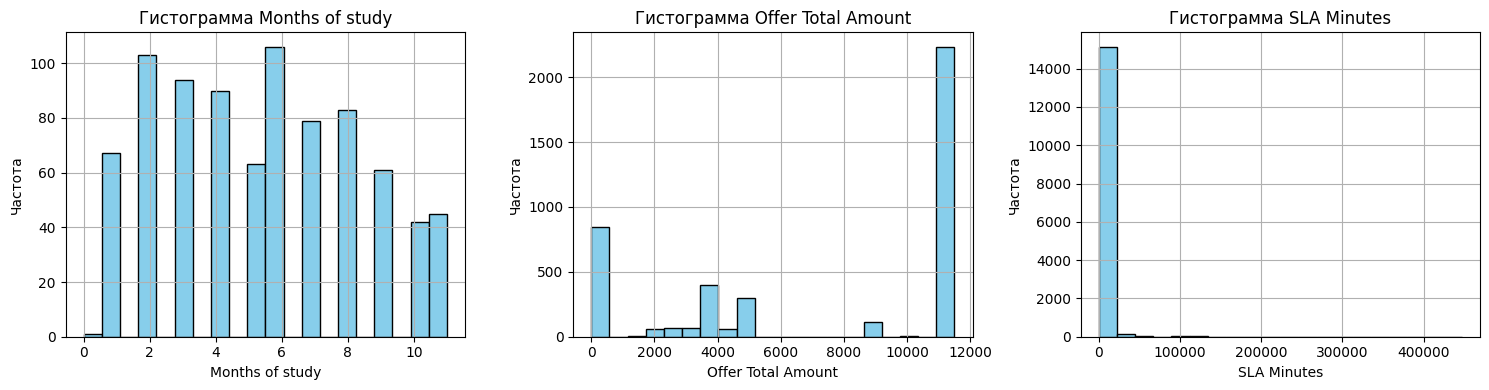

In [24]:
plot_histograms(deals, cols_deals_num)

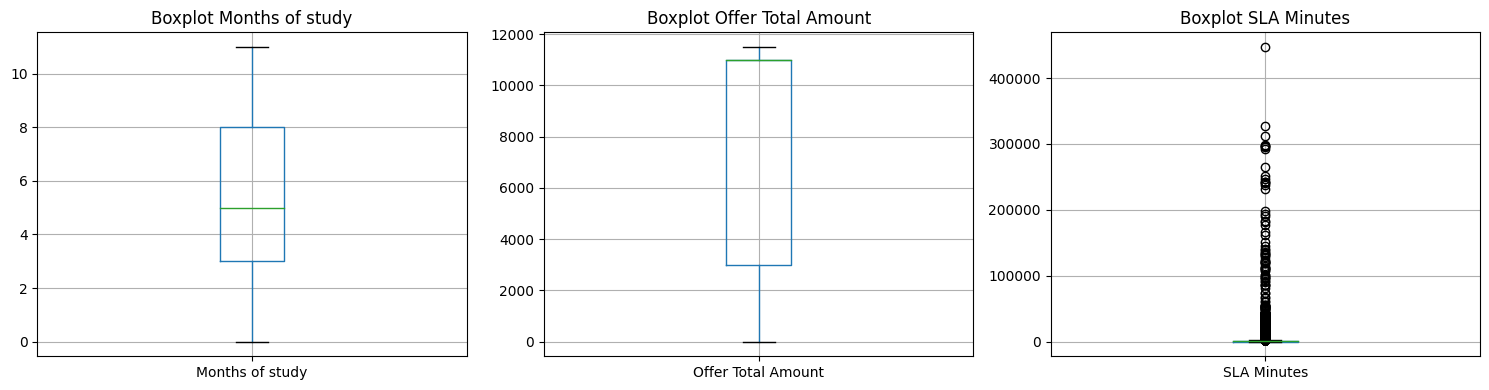

In [25]:
plot_boxplots(deals, cols_deals_num)

## Общая статистика по категориальным полям

In [26]:
def plot_bar(dataframe, col):
    plt.figure(figsize=(8, 5))
    
    # Считаем количество значений для каждой категории и сортируем по убыванию
    sorted_counts = dataframe[col].value_counts().index
    
    # Построение графика с отсортированными категориями
    sns.countplot(data=dataframe, x=col, order=sorted_counts, palette='Set2')
    
    plt.title(f'Частота категорий в {col} (сортировано)')
    plt.xticks(rotation=90)
    plt.show()

In [27]:
def cat_counts(df, cols):
    for col in cols:
        print(col)
        uniq = df[col].nunique()
        print(f'{uniq} - уникальных значений')
        if uniq <= 50:
            print()
            print('% для каждого значения категории')
            display(df[col].value_counts(normalize=True) * 100)
            plot_bar(df, col)            

### calls

Call Owner Name
31 - уникальных значений

% для каждого значения категории


Call Owner Name
Victor Barnes      10.164108
Yara Edwards        8.386504
Julia Nelson        7.514419
Charlie Davis       7.383467
Ian Miller          6.840155
Diana Evans         6.675768
Ulysses Adams       6.252264
Kevin Parker        6.213257
Nina Scott          5.683876
Amy Green           5.494414
Paula Underwood     4.661336
Quincy Vincent      4.410576
Jane Smith          3.396395
Cara Iverson        2.933883
John Doe            2.919952
Ben Hall            2.841938
Derek James         1.560280
Mason Roberts       1.025327
Alice Johnson       1.000251
Sam Young           0.958458
George King         0.891588
Eva Kent            0.532167
Zachary Foster      0.484801
Rachel White        0.415146
Ethan Harris        0.348277
Xander Dean         0.325987
Hannah Lee          0.236828
Wendy Clark         0.195035
Bob Brown           0.133738
Fiona Jackson       0.108662
Oliver Taylor       0.011145
Name: proportion, dtype: float64

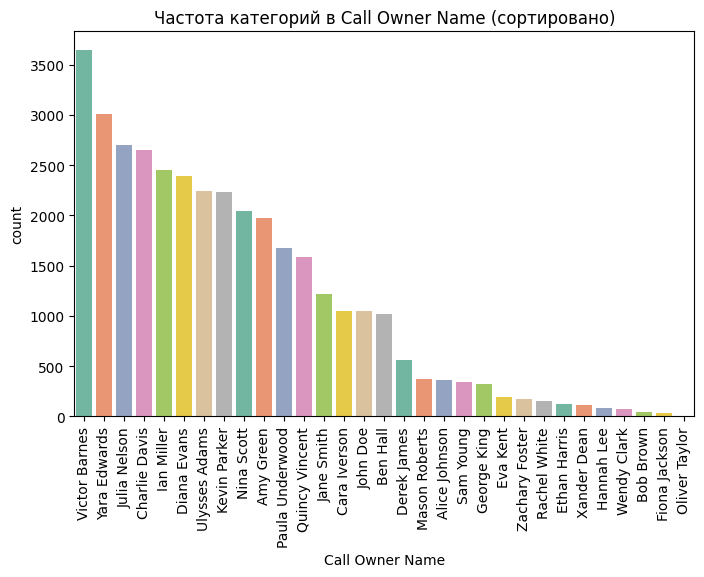

CONTACTID
12333 - уникальных значений


In [30]:
cat_counts(calls, cols_calls_cat)

#### spend

Source
13 - уникальных значений

% для каждого значения категории


Source
Facebook Ads      47.433835
Tiktok Ads        14.943705
Youtube Ads        9.387337
Google Ads         6.960082
Telegram posts     4.888629
Bloggers           3.835843
Webinar            3.733489
SMM                2.992640
Organic            2.524736
CRM                1.730272
Partnership        1.140518
Offline            0.297314
Radio              0.131598
Name: proportion, dtype: float64

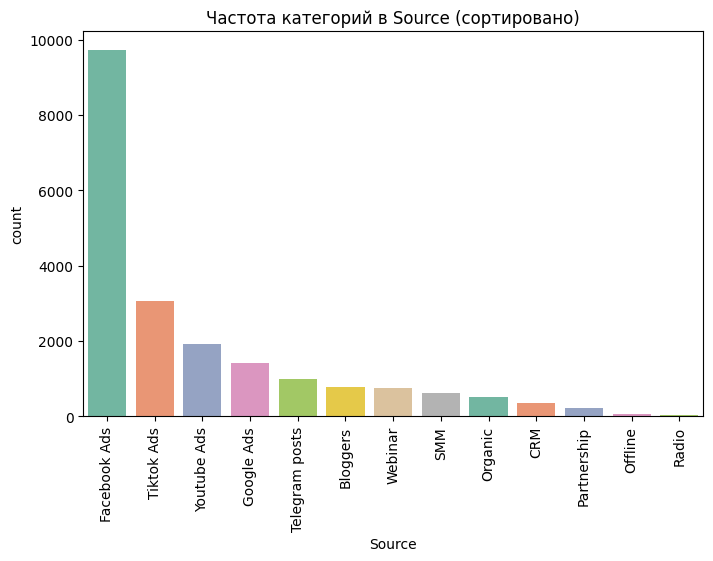

Campaign
50 - уникальных значений

% для каждого значения категории


Campaign
12.07.2023wide_DE              14.183087
02.07.23wide_DE                11.528462
04.07.23recentlymoved_DE        9.564860
youtube_shorts_DE               8.367542
07.07.23LAL_DE                  8.080186
03.07.23women                   8.011768
12.09.23interests_Uxui_DE       7.820197
15.07.23b_DE                    3.619321
24.09.23retargeting_DE          3.448276
performancemax_DE               2.428845
20.03.2024wide_PL               1.642036
30.11.23wide_DE                 1.594143
05.07.23interests_DE            1.464149
17.03.24wide_AT                 1.354680
20.03.24interests_WebDev_PL     1.156267
discovery_DE                    1.135742
brand_search_eng_DE             0.998905
youtube_shorts_AT               0.909962
08.04.24wide_webinar_DE         0.909962
20.05.24interests_DE            0.889436
20.03.24wide_PL                 0.882594
15.03.2024wide_AT               0.759442
15.11.23wide_webinar_DE         0.732074
01.04.23women_PL                0.704707
perform

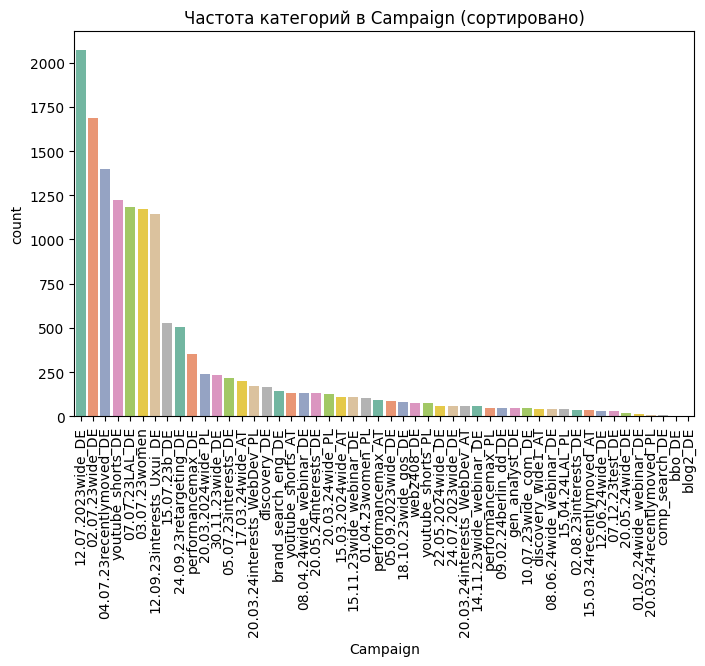

AdGroup
18 - уникальных значений

% для каждого значения категории


AdGroup
wide                           39.551589
recentlymoved                  10.462923
women                           9.243941
LAL                             8.852126
Com_august                      7.785517
interest_work_WebDev            5.318531
interest_programming_WebDev     4.614715
b                               4.106806
retargeting                     3.656944
Com_march                       1.494703
interest_work                   1.313307
Com_july_1                      1.088376
interest_programming            0.936003
promoposts_b                    0.515165
berlin_wide                     0.348280
interest_all                    0.261210
interest_dataanalytics          0.246699
interest_python-developer       0.203164
Name: proportion, dtype: float64

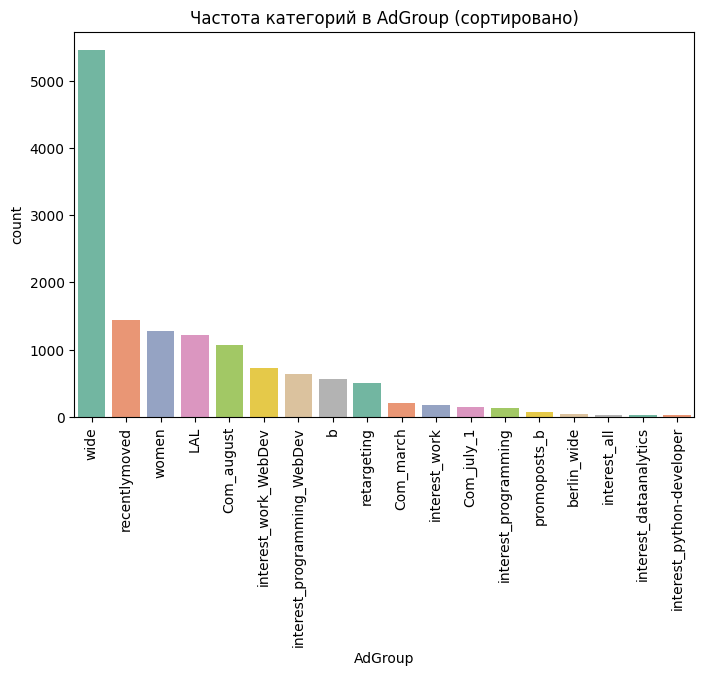

Ad
165 - уникальных значений


In [31]:
cat_counts(spend, cols_spend_cat)

### deals

Deal Owner Name
27 - уникальных значений

% для каждого значения категории


Deal Owner Name
Charlie Davis      13.787290
Julia Nelson       10.363883
Ulysses Adams      10.059476
Quincy Vincent      8.706037
Paula Underwood     8.593640
Ben Hall            6.214583
Nina Scott          5.975741
Victor Barnes       5.736899
Cara Iverson        4.786213
Diana Evans         4.725331
Jane Smith          4.626984
Rachel White        4.074369
Kevin Parker        2.674097
Ian Miller          2.322859
Eva Kent            2.112115
Bob Brown           1.550133
Mason Roberts       1.250410
Oliver Taylor       0.758676
George King         0.440219
Yara Edwards        0.398071
Amy Green           0.309090
Sam Young           0.304407
Alice Johnson       0.117080
John Doe            0.084297
Xander Dean         0.014050
Wendy Clark         0.009366
Zachary Foster      0.004683
Name: proportion, dtype: float64

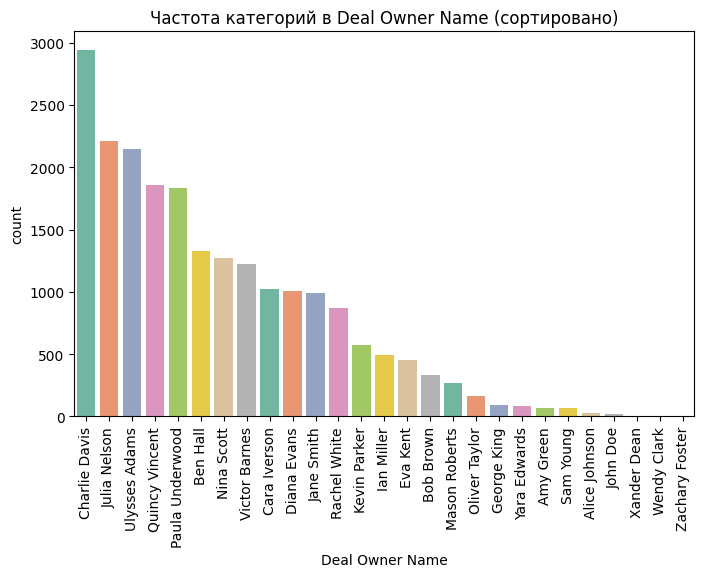

Stage
13 - уникальных значений

% для каждого значения категории


Stage
Lost                         73.066130
Call Delayed                 10.167431
Registered on Webinar         9.671686
Payment Done                  3.979983
Waiting For Payment           1.501263
Qualificated                  0.598634
Registered on Offline Day     0.467683
Need to Call - Sales          0.149659
Need To Call                  0.144982
Test Sent                     0.116921
Need a consultation           0.107567
New Lead                      0.023384
Free Education                0.004677
Name: proportion, dtype: float64

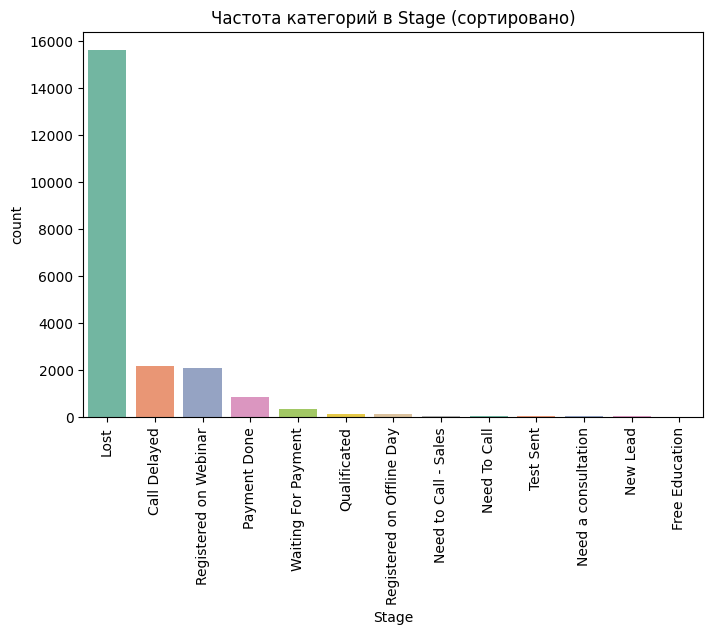

Lost Reason
21 - уникальных значений

% для каждого значения категории


Lost Reason
Doesn't Answer                             25.728216
Changed Decision                           13.301663
Duplicate                                  10.951369
Non target                                 10.870109
Stopped Answering                           9.826228
Invalid number                              9.188649
needs time to think                         4.069259
Expensive                                   3.900488
Conditions are not suitable                 3.306663
Next stream                                 1.781473
Inadequate                                  1.093887
Gutstein refusal                            1.068884
Not for myself                              0.906363
Considering a different direction in IT     0.887611
Does not speak English                      0.856357
Didn't leave an application                 0.831354
Thought for free                            0.687586
Does not know how to use a computer         0.312539
Went to Rivals                    

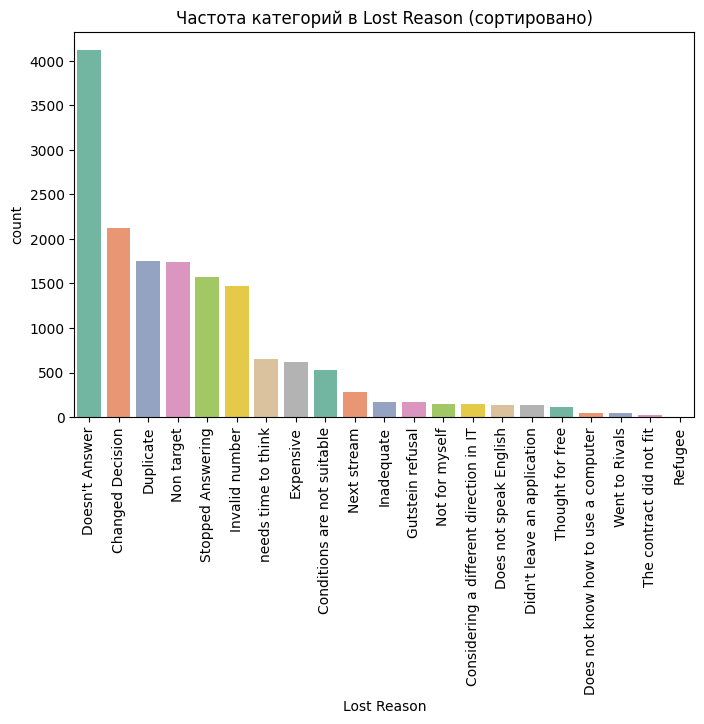

Payment Type
3 - уникальных значений

% для каждого значения категории


Payment Type
Recurring Payments    70.647773
One Payment           28.340081
Reservation            1.012146
Name: proportion, dtype: float64

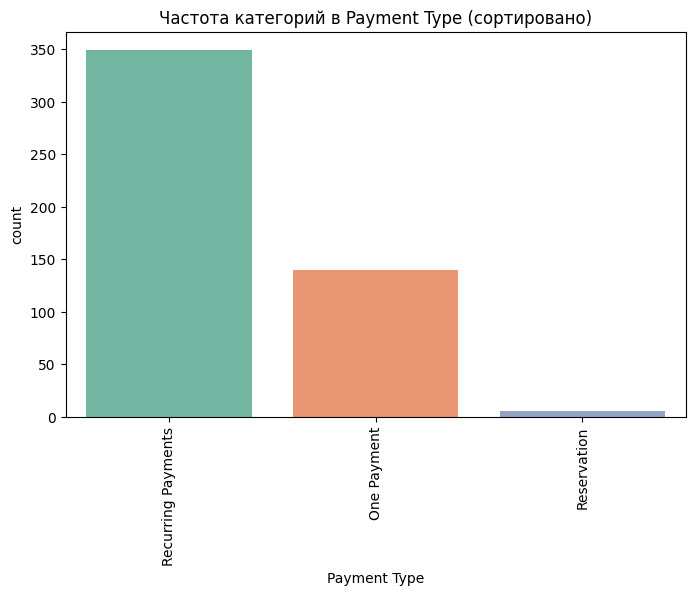

Product
5 - уникальных значений

% для каждого значения категории


Product
Digital Marketing      55.483690
UX/UI Design           28.374578
Web Developer          16.001125
Find yourself in IT     0.112486
Data Analytics          0.028121
Name: proportion, dtype: float64

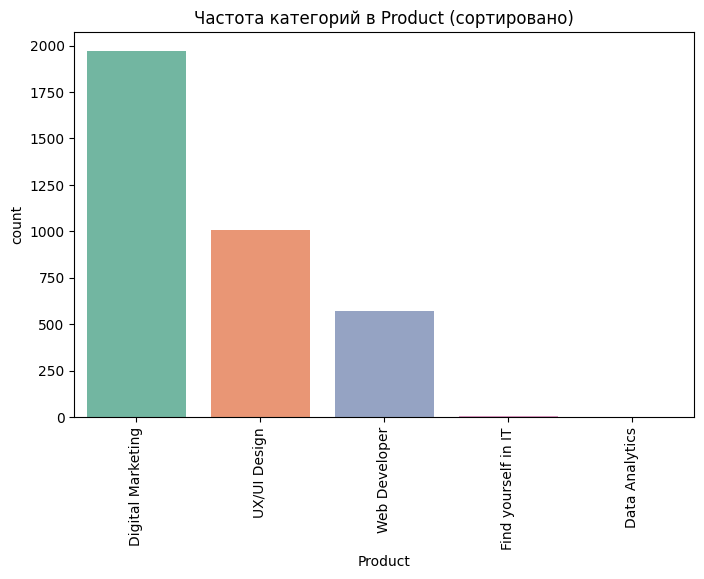

Education Type
2 - уникальных значений

% для каждого значения категории


Education Type
Morning    87.680049
Evening    12.319951
Name: proportion, dtype: float64

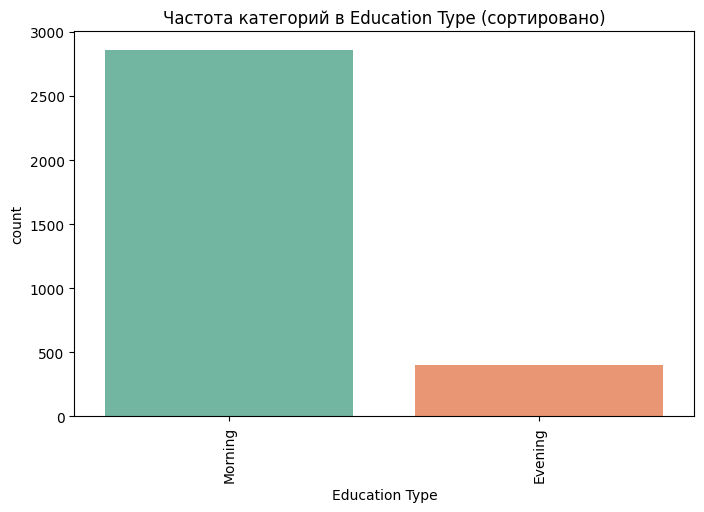

Course duration
2 - уникальных значений

% для каждого значения категории


Course duration
11    83.976345
6     16.023655
Name: proportion, dtype: Float64

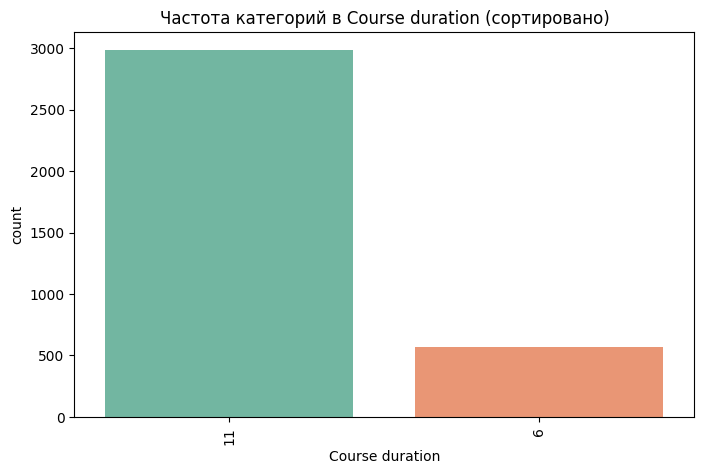

City
870 - уникальных значений
Source
12 - уникальных значений

% для каждого значения категории


Source
Facebook Ads      22.654569
Google Ads        19.736227
Organic           11.944626
Tiktok Ads         9.592180
SMM                8.090918
Youtube Ads        7.749509
CRM                7.740155
Bloggers           5.093069
Telegram posts     4.681508
Webinar            1.767842
Partnership        0.940043
Offline            0.009354
Name: proportion, dtype: float64

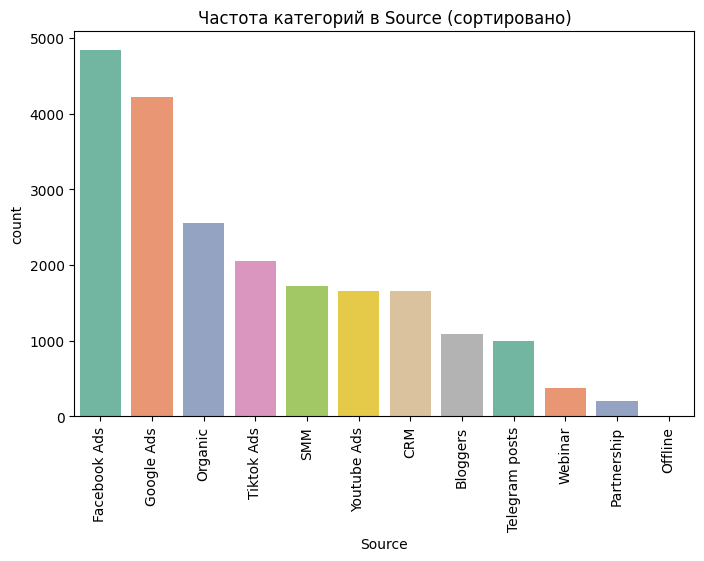

Campaign
152 - уникальных значений


In [32]:
cat_counts(deals, cols_deals_cat)

Посмотрим статистику в разрезе Продукта и Типа обучения

In [33]:
deals.groupby(['Product', 'Education Type']).count().reset_index()

,Product,Education Type,Id,Deal Owner Name,Closing Date,Stage,Lost Reason,Campaign,Source,Payment Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,SLA Minutes,Paid
0,Digital Marketing,Evening,249,249,200,249,123,192,249,143,249,249,112,249,222,247,175,236,249
1,Digital Marketing,Morning,1517,1517,736,1517,907,1148,1517,140,1517,1517,350,1517,1487,1508,1085,1477,1517
2,UX/UI Design,Evening,153,153,117,153,81,112,153,72,153,153,58,153,134,152,90,149,153
3,UX/UI Design,Morning,796,796,395,796,489,539,796,57,796,796,171,796,784,789,616,769,796
4,Web Developer,Morning,540,540,234,540,273,359,540,68,540,540,136,540,530,536,440,516,540
